In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)

## <font color = blue> Credit EDA Case Study </font>

'application_data.csv' contains all the information of the client at the time of application and the data is about whether a client has payment difficulties. 

'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

###  Task 1: Reading the data

- Reading the application data file provided and storing it in a dataframe `new_applications`

In [3]:
# Read the csv file using 'read_csv'.

new_applications = pd.read_csv('application_data.csv')

- Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Checking the number of rows and columns in the dataframe

new_applications.shape

(307511, 122)

In [5]:
new_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
new_applications.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
# Checking the null-values percentage in all the columns

new_applications.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

###  Task 2: Cleaning the data

- dropping the columns whose missing values are more than 45%

In [8]:
# Dropping unwanted columns and columns whose missing values percentage is more than 45%

new_applications = new_applications.drop(new_applications.loc[:,'EXT_SOURCE_1':'AMT_REQ_CREDIT_BUREAU_QRT'], axis = 1)

In [9]:
new_applications = new_applications.drop(['OWN_CAR_AGE'], axis = 1)

In [10]:
# Occupation_type column is have 31% of missing values but interupting us to drop null rows. Hence fdropping the column
new_applications = new_applications.drop(['OCCUPATION_TYPE'], axis = 1)

In [11]:
new_applications.shape

(307511, 40)

In [12]:
new_applications.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

###  Task 3: Handling the data

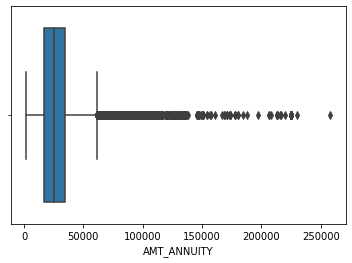

In [13]:
sns.boxplot(x = new_applications.AMT_ANNUITY)
plt.show()

- ##### AMT_ANNUITY column has lot of outliers and imputing with mean will skew the data visualization. So, imputing with median will help. And, dropping outliers above 99% will be very useful

In [14]:
#AMT_ANNUITY column
new_applications['AMT_ANNUITY'].fillna(new_applications['AMT_ANNUITY'].median(), inplace=True)

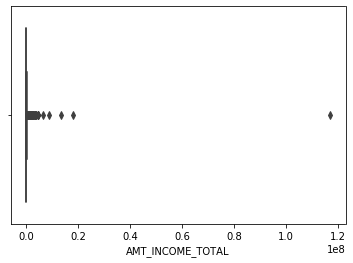

In [15]:
#AMT_INCOME_TOTAL column
sns.boxplot(x = new_applications.AMT_INCOME_TOTAL)
plt.show()

- #### AMT_INCOME_TOTAL column has outliers. Dropping outliers above 99% will be very useful

In [16]:
new_applications = new_applications[new_applications.AMT_INCOME_TOTAL<np.nanpercentile(new_applications['AMT_INCOME_TOTAL'], 99)]

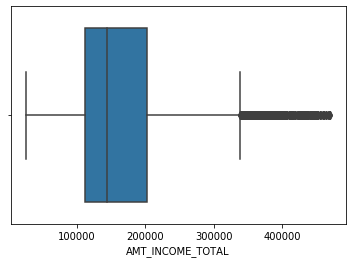

In [17]:
sns.boxplot(x = new_applications.AMT_INCOME_TOTAL)
plt.show()

In [18]:
#Count of family members
new_applications['CNT_FAM_MEMBERS'].value_counts()

2.0     156804
1.0      67267
3.0      52017
4.0      24392
5.0       3416
6.0        399
7.0         80
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

- ##### Hence imputing missing 2 values with most counted family members

In [19]:
new_applications['CNT_FAM_MEMBERS'] = new_applications['CNT_FAM_MEMBERS'].fillna(2)

In [20]:
new_applications['CNT_FAM_MEMBERS'] = new_applications['CNT_FAM_MEMBERS'].apply(lambda x: '{:,.0f}'.format(x))

In [21]:
new_applications = new_applications.dropna(axis = 0)

In [22]:
new_applications.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

### Task 4: Verifying the data types and NA/XNA values

In [23]:
new_applications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262046 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   262046 non-null  int64  
 1   TARGET                       262046 non-null  int64  
 2   NAME_CONTRACT_TYPE           262046 non-null  object 
 3   CODE_GENDER                  262046 non-null  object 
 4   FLAG_OWN_CAR                 262046 non-null  object 
 5   FLAG_OWN_REALTY              262046 non-null  object 
 6   CNT_CHILDREN                 262046 non-null  int64  
 7   AMT_INCOME_TOTAL             262046 non-null  float64
 8   AMT_CREDIT                   262046 non-null  float64
 9   AMT_ANNUITY                  262046 non-null  float64
 10  AMT_GOODS_PRICE              262046 non-null  float64
 11  NAME_TYPE_SUITE              262046 non-null  object 
 12  NAME_INCOME_TYPE             262046 non-null  object 
 13 

In [24]:
# Handling NA/XNA values in the dataframe
new_applications['CODE_GENDER'].value_counts()

F      174289
M       87753
XNA         4
Name: CODE_GENDER, dtype: int64

In [25]:
new_applications['CODE_GENDER'] = new_applications['CODE_GENDER'].replace('XNA', 'F')

- #### Imputing with most counted value in categorical vriable 

In [26]:
new_applications['CODE_GENDER'].value_counts()

F    174293
M     87753
Name: CODE_GENDER, dtype: int64

In [27]:
new_applications['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    57043
XNA                       47372
Self-employed             31545
Other                     14264
Medicine                   9977
Business Entity Type 2     9328
Government                 9157
School                     7915
Trade: type 7              6434
Kindergarten               6123
Construction               5601
Business Entity Type 1     5161
Transport: type 4          4625
Industry: type 9           2984
Trade: type 3              2936
Industry: type 3           2829
Security                   2776
Housing                    2566
Industry: type 11          2341
Military                   2279
Bank                       2190
Police                     2116
Transport: type 2          2026
Agriculture                2002
Postal                     1833
Security Ministries        1783
Trade: type 2              1510
Restaurant                 1476
Services                   1331
University                 1161
Industry: type 7           1145
Transpor

- ##### XNA is having 55178 XNA values (second top record) imputing with most counted Organization type will skew our predictions. Hence dropping the XNA columns

In [28]:
# Dropping XNA values
new_applications = new_applications[~(new_applications['ORGANIZATION_TYPE'] == 'XNA')]

In [29]:
new_applications['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    57043
Self-employed             31545
Other                     14264
Medicine                   9977
Business Entity Type 2     9328
Government                 9157
School                     7915
Trade: type 7              6434
Kindergarten               6123
Construction               5601
Business Entity Type 1     5161
Transport: type 4          4625
Industry: type 9           2984
Trade: type 3              2936
Industry: type 3           2829
Security                   2776
Housing                    2566
Industry: type 11          2341
Military                   2279
Bank                       2190
Police                     2116
Transport: type 2          2026
Agriculture                2002
Postal                     1833
Security Ministries        1783
Trade: type 2              1510
Restaurant                 1476
Services                   1331
University                 1161
Industry: type 7           1145
Transport: type 3           967
Industry

In [30]:
new_applications.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [31]:
new_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,1.0


In [32]:
#Handling DAYS_BIRTH - converting to years
new_applications['DAYS_BIRTH'] = new_applications['DAYS_BIRTH'].abs()
new_applications['YEARS_BIRTH'] = (new_applications['DAYS_BIRTH']/365).apply(lambda x: '{:,.0f}'.format(x))

In [33]:
new_applications = new_applications.drop(['DAYS_BIRTH'], axis = 1)
new_applications['YEARS_BIRTH'] = new_applications['YEARS_BIRTH'].astype(int)

In [34]:
new_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,55
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-1588,-4970.0,-477,1,1,1,1,1,0,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,1.0,46


In [35]:
#Converting other columns values from negative to positive
new_applications['DAYS_EMPLOYED'] = new_applications['DAYS_EMPLOYED'].abs()
new_applications['YEARS_EMPLOYED'] = (new_applications['DAYS_EMPLOYED']/365).apply(lambda x: '{:,.0f}'.format(x))

In [36]:
new_applications = new_applications.drop(['DAYS_EMPLOYED'], axis = 1)
new_applications['YEARS_EMPLOYED'] = new_applications['YEARS_EMPLOYED'].astype(int)

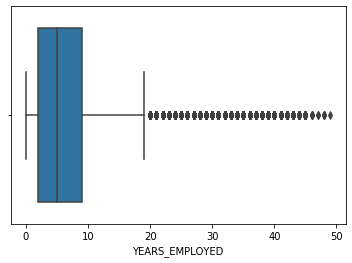

In [37]:
sns.boxplot(x = new_applications.YEARS_EMPLOYED)
plt.show()

- #### On an average, the jobs of applicants seem stable

In [38]:
new_applications['DAYS_REGISTRATION'] = new_applications['DAYS_REGISTRATION'].abs()
new_applications['DAYS_ID_PUBLISH'] = new_applications['DAYS_ID_PUBLISH'].abs()

In [39]:
new_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,46,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,52,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,55,8
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,4970.0,477,1,1,1,1,1,0,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,1.0,46,4


In [40]:
# Columns converting to numeric

col = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','YEARS_BIRTH','YEARS_EMPLOYED']

new_applications[col] =new_applications[col].apply(pd.to_numeric)
new_applications.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,46,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,52,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,55,8
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,4970.0,477,1,1,1,1,1,0,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,1.0,46,4


In [41]:
new_applications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214674 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   214674 non-null  int64  
 1   TARGET                       214674 non-null  int64  
 2   NAME_CONTRACT_TYPE           214674 non-null  object 
 3   CODE_GENDER                  214674 non-null  object 
 4   FLAG_OWN_CAR                 214674 non-null  object 
 5   FLAG_OWN_REALTY              214674 non-null  object 
 6   CNT_CHILDREN                 214674 non-null  int64  
 7   AMT_INCOME_TOTAL             214674 non-null  float64
 8   AMT_CREDIT                   214674 non-null  float64
 9   AMT_ANNUITY                  214674 non-null  float64
 10  AMT_GOODS_PRICE              214674 non-null  float64
 11  NAME_TYPE_SUITE              214674 non-null  object 
 12  NAME_INCOME_TYPE             214674 non-null  object 
 13 

### Task 5: Grouping and Binning

In [42]:
new_applications['AGE_GROUP'] = pd.cut(x = new_applications['YEARS_BIRTH'], bins = [0, 20, 40, 60, 150], labels = ['Teenagers(below 20)', 'Middle age(20-40)', 'Above middle age(40-60)','Senior Citizens(above 60)'] )

#### Binning on Continuous Variables
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE

In [43]:
# Binnings on Income columns - AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

new_applications['INCOME_RANGE'] = pd.cut(x = new_applications['AMT_INCOME_TOTAL'], bins = [0, 200000, 400000, 600000, 800000, 1000000, 5000000, 10000000, 50000000, 100000000, 10000000000], labels = ['Income Below 2 lakhs','Income between 2-4 lakhs','Income between 4-6 lakhs','Income between 6-8 lakhs','Income between 8-10 lakhs','Income between 10-50 lakhs','Income between 50-100 lakhs','Income between 100-500 lakhs','Income between 500-1000 lakhs', 'Income 1000 lakhs and above'])


In [44]:
new_applications['CREDIT_RANGE'] = pd.cut(x = new_applications['AMT_CREDIT'], bins = [0, 200000, 400000, 600000, 800000, 1000000, 5000000, 100000000], labels = ['credit below 2 lakhs','Credit between 2-4 lakhs','Credit between 4-6 lakhs','Credit between 6-8 lakhs','Credit between 8-10 lakhs','Credit between 10-50 lakhs','Credit above 50 lakhs'])


In [45]:
new_applications['EMI_RANGE'] = pd.cut(x = new_applications['AMT_ANNUITY'], bins = [0, 2500, 5000, 7500, 10000, 25000, 50000, 75000, 100000, 10000000], labels = ['EMI below 2500','EMI between 2500-5000','EMI between 5000-7500','EMI between 7500-10000','EMI between 10000-25000','EMI between 25000-50000','EMI between 50000-75000','EMI between 75000-100000','EMI above 1 lakh'])


In [46]:
new_applications['LOAN_on_GOODS'] = pd.cut(x = new_applications['AMT_GOODS_PRICE'], bins = [0, 200000, 250000, 500000, 750000, 1000000, 5000000, 10000000], labels = ['below 2 lakhs','Between 2-2.5 lakhs','Between 2.5-5 lakhs','Between 5-7.5 lakhs','Between 7.5-10 lakhs','Between 10-50 lakhs','Above 50 lakhs'])


In [47]:
new_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,AGE_GROUP,INCOME_RANGE,CREDIT_RANGE,EMI_RANGE,LOAN_on_GOODS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1.0,26,2,Middle age(20-40),Income between 2-4 lakhs,Credit between 4-6 lakhs,EMI between 10000-25000,Between 2.5-5 lakhs
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,46,3,Above middle age(40-60),Income between 2-4 lakhs,Credit between 10-50 lakhs,EMI between 25000-50000,Between 10-50 lakhs
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,52,1,Above middle age(40-60),Income Below 2 lakhs,credit below 2 lakhs,EMI between 5000-7500,below 2 lakhs
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,55,8,Above middle age(40-60),Income Below 2 lakhs,Credit between 4-6 lakhs,EMI between 10000-25000,Between 5-7.5 lakhs
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,4970.0,477,1,1,1,1,1,0,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,1.0,46,4,Above middle age(40-60),Income Below 2 lakhs,Credit between 4-6 lakhs,EMI between 25000-50000,Between 2.5-5 lakhs


#### Target variable 
- ##### 1 - Defaulters - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 
- ##### 0 - Non-defaulters - all other cases

In [48]:
Non_defaulters = new_applications.loc[new_applications["TARGET"]==0]
Defaulters = new_applications.loc[new_applications["TARGET"]==1]

In [49]:
Defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,AGE_GROUP,INCOME_RANGE,CREDIT_RANGE,EMI_RANGE,LOAN_on_GOODS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1.0,26,2,Middle age(20-40),Income between 2-4 lakhs,Credit between 4-6 lakhs,EMI between 10000-25000,Between 2.5-5 lakhs
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,6573.0,1827,1,1,0,1,0,0,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,2.0,51,7,Above middle age(40-60),Income Below 2 lakhs,Credit between 8-10 lakhs,EMI between 25000-50000,Between 5-7.5 lakhs
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,1182.0,1029,1,1,0,1,0,0,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,4.0,48,3,Above middle age(40-60),Income between 2-4 lakhs,Credit between 10-50 lakhs,EMI between 25000-50000,Between 7.5-10 lakhs
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,45.0,4409,1,1,1,1,1,0,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,2.0,37,10,Middle age(20-40),Income Below 2 lakhs,Credit between 2-4 lakhs,EMI between 10000-25000,Between 2-2.5 lakhs
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,4802.0,1038,1,1,0,1,0,0,1,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,2.0,28,6,Middle age(20-40),Income between 2-4 lakhs,Credit between 8-10 lakhs,EMI between 50000-75000,Between 7.5-10 lakhs


In [50]:
len(Non_defaulters)

196796

In [51]:
len(Defaulters)

17878

In [52]:
# Calculating Imbalance percentage
    
round(len(Non_defaulters)/len(Defaulters),2)

11.01

### Task 6: Univariant Analysis

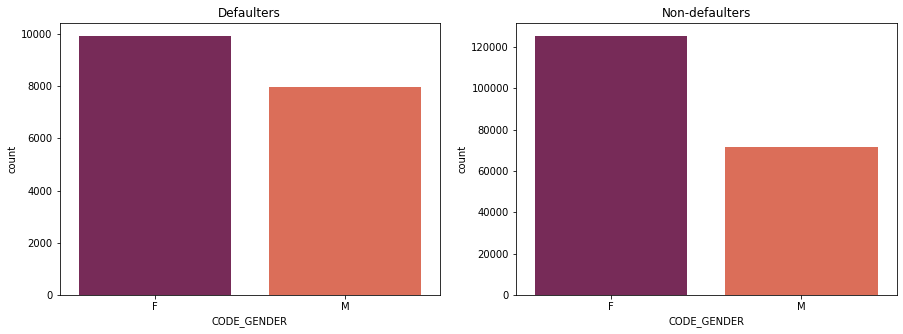

In [98]:
# CODE_GENDER
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('CODE_GENDER', data = Defaulters, order = ['F','M'], palette = 'rocket')
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('CODE_GENDER', data = Non_defaulters, order = ['F','M'], palette = 'rocket')
plt.title("Non-defaulters")
plt.show()

- #### In both defaulters and Non-defaulters Female count is high compared to Males

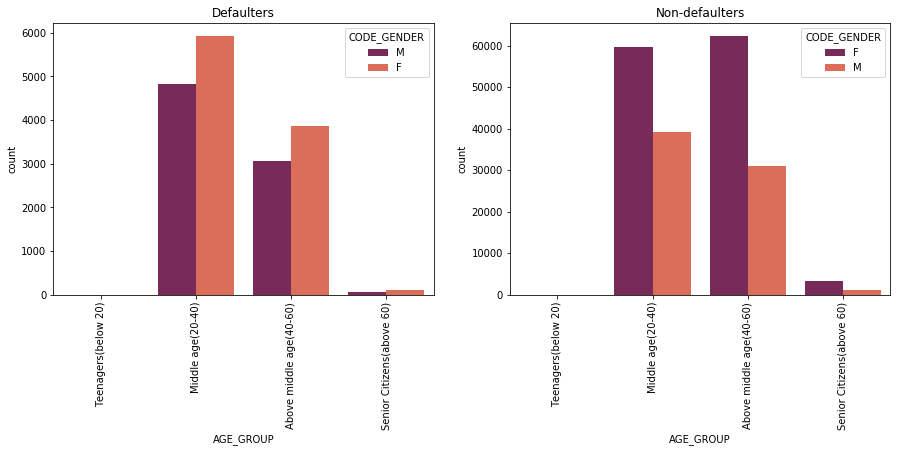

In [54]:
#AGE_GROUP
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('AGE_GROUP', data = Defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('AGE_GROUP', data = Non_defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Non-defaulters")
plt.show()

- #### Most of the applicants are aged between 20-60. In Defaulters 'Females' are more compared to 'Males' and in Non-defaulters also 'Females' are high compared to 'Males'. But there is double the difference in Non-defaulters 40-60 age group.

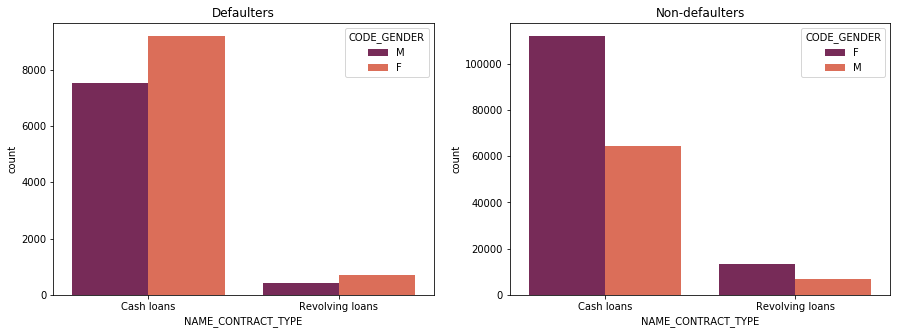

In [55]:
# NAME_CONTRACT_TYPE
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('NAME_CONTRACT_TYPE', data = Defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('NAME_CONTRACT_TYPE', data = Non_defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.title("Non-defaulters")
plt.show()

- #### Defaulters - Females count is high in both Defaulters and Non-defaulters

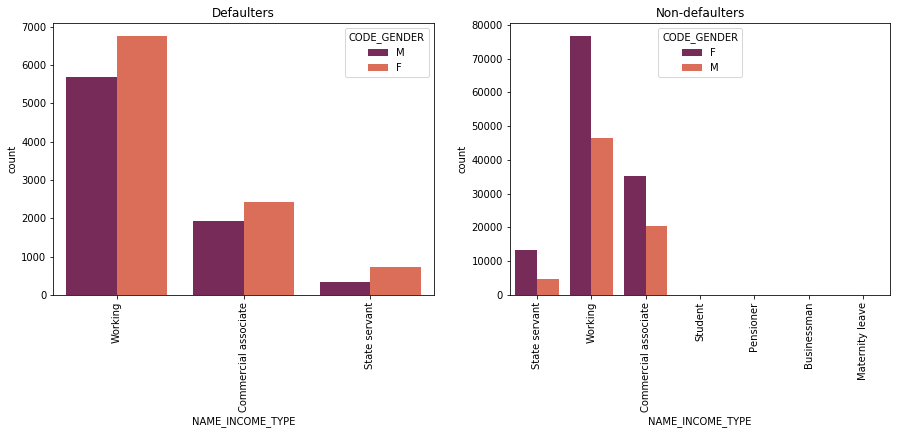

In [56]:
#NAME_INCOME_TOTAL
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('NAME_INCOME_TYPE', data = Defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('NAME_INCOME_TYPE', data = Non_defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Non-defaulters")
plt.show()

- #### Among all other Income types - most targetted are 'working' people. Compared to gender 'Females' are more in both Defaulters and Non-defaulters. Second targetted type of people are Commercial associates.

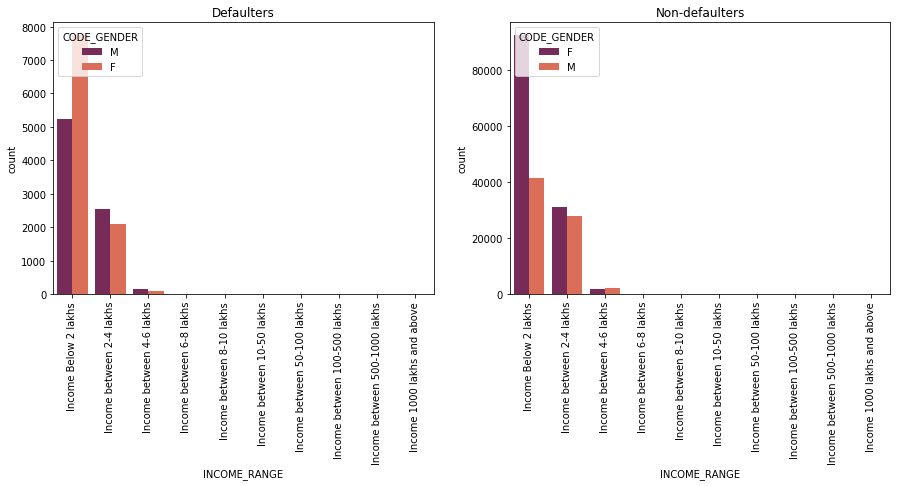

In [57]:
#INCOME_RANGE
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('INCOME_RANGE', data = Defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('INCOME_RANGE', data = Non_defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Non-defaulters")
plt.show()

- #### Income Below 2 lakhs are the most of the people in both defaulters and non-defaulters.

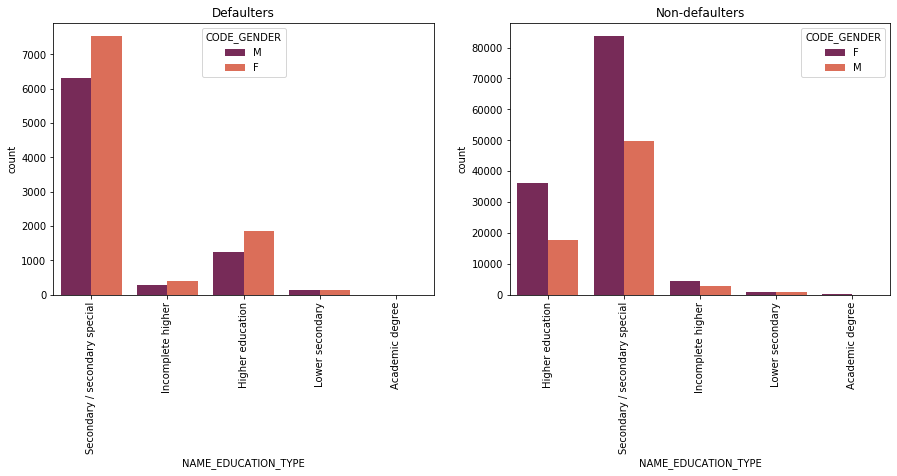

In [58]:
#NAME_EDUCATION_TYPE
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('NAME_EDUCATION_TYPE', data = Defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('NAME_EDUCATION_TYPE', data = Non_defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Non-defaulters")
plt.show()

- #### Secondary/secondary special education category is the one having many applicants for loan and the one who most of the people are in defaulters as well

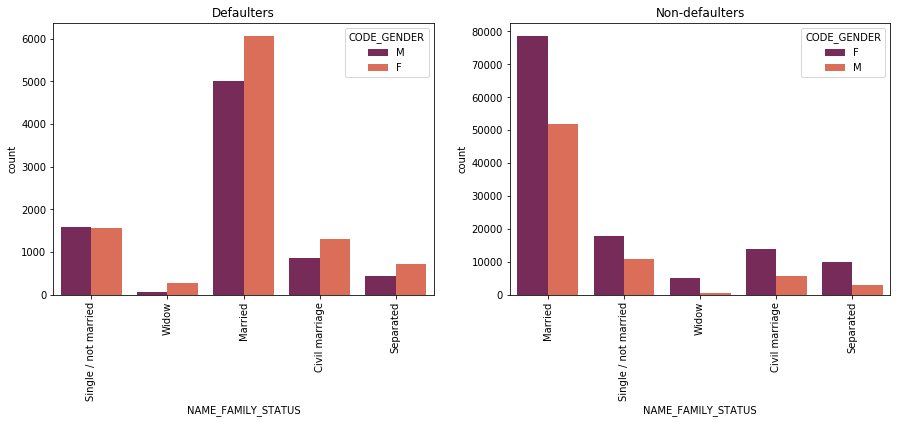

In [59]:
#NAME_FAMILY_STATUS
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('NAME_FAMILY_STATUS', data = Defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('NAME_FAMILY_STATUS', data = Non_defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Non-defaulters")
plt.show()

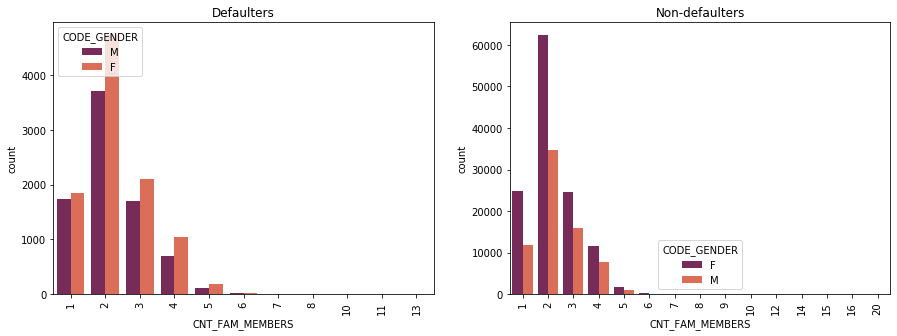

In [60]:
#CNT_FAM_MEMBERS
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('CNT_FAM_MEMBERS', data = Defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('CNT_FAM_MEMBERS', data = Non_defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Non-defaulters")
plt.show()

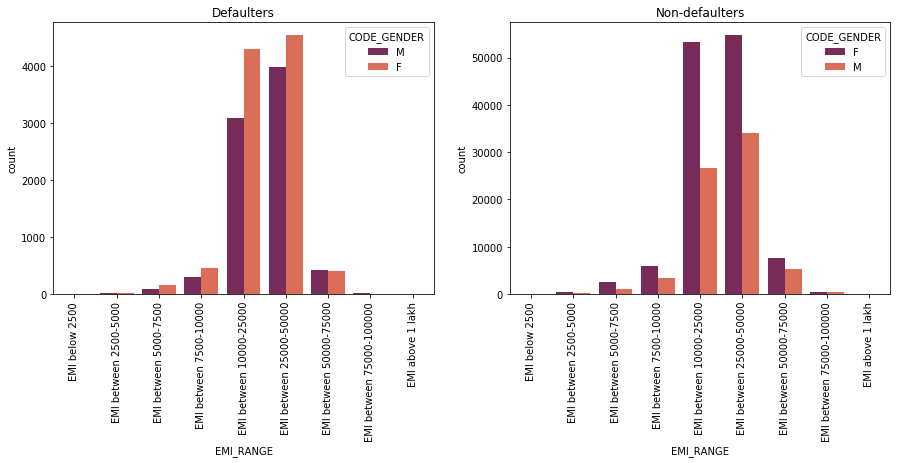

In [61]:
#EMI_RANGE
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('EMI_RANGE', data = Defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('EMI_RANGE', data = Non_defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Non-defaulters")
plt.show()

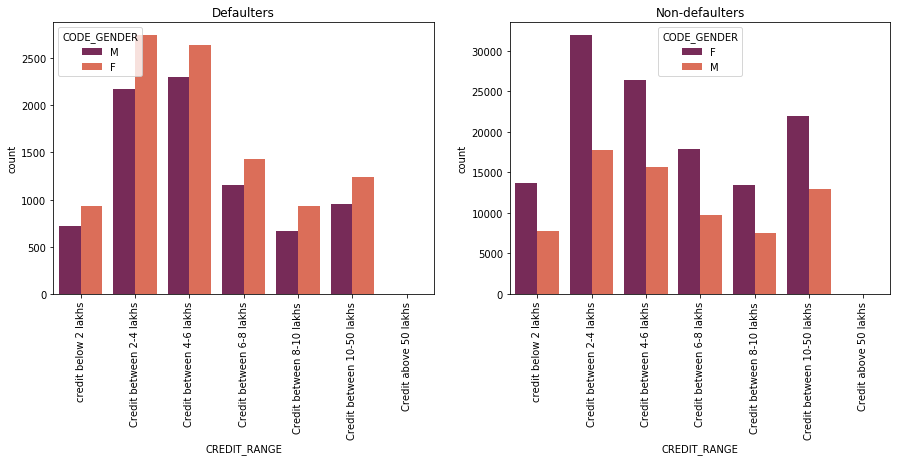

In [62]:
#CREDIT_RANGE
plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
sns.countplot('CREDIT_RANGE', data = Defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot('CREDIT_RANGE', data = Non_defaulters, hue='CODE_GENDER', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("Non-defaulters")
plt.show()

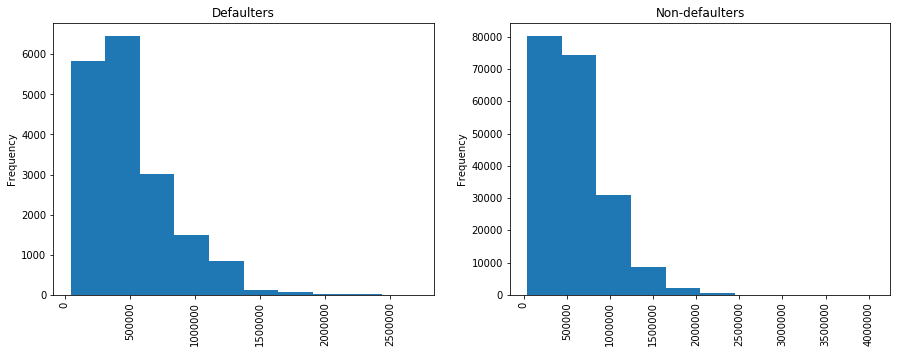

In [63]:
#Continuous varaibles

plt.figure(figsize = [15,5])
plt.subplot(1,2,1) 
Defaulters['AMT_GOODS_PRICE'].plot.hist()
plt.xticks(rotation=90)
plt.title("Defaulters")
plt.subplot(1,2,2)
Non_defaulters['AMT_GOODS_PRICE'].plot.hist()
plt.xticks(rotation=90)
plt.title("Non-defaulters")
plt.show()

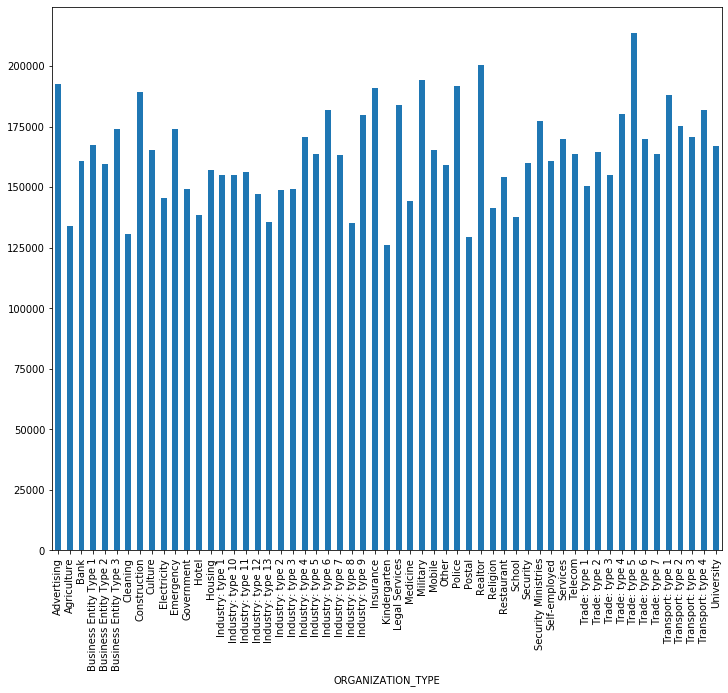

In [64]:
#Plotting total income vs occupation type for Defaulters
plt.figure(figsize=[12,10])
Defaulters.groupby("ORGANIZATION_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

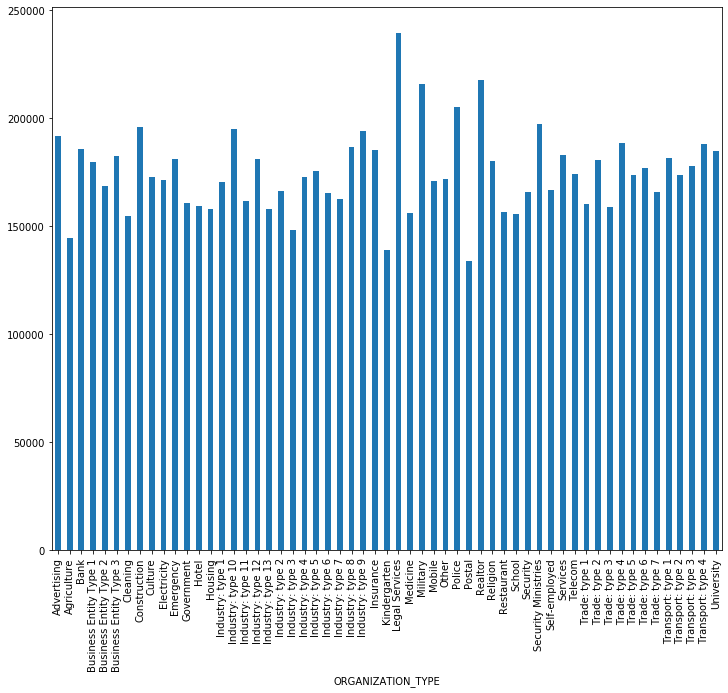

In [65]:
#Plotting total income vs occupation type for Non-Defaulters
plt.figure(figsize=[12,10])
Non_defaulters.groupby("ORGANIZATION_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

In [66]:
new_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,AGE_GROUP,INCOME_RANGE,CREDIT_RANGE,EMI_RANGE,LOAN_on_GOODS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1.0,26,2,Middle age(20-40),Income between 2-4 lakhs,Credit between 4-6 lakhs,EMI between 10000-25000,Between 2.5-5 lakhs
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,46,3,Above middle age(40-60),Income between 2-4 lakhs,Credit between 10-50 lakhs,EMI between 25000-50000,Between 10-50 lakhs
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,52,1,Above middle age(40-60),Income Below 2 lakhs,credit below 2 lakhs,EMI between 5000-7500,below 2 lakhs
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,55,8,Above middle age(40-60),Income Below 2 lakhs,Credit between 4-6 lakhs,EMI between 10000-25000,Between 5-7.5 lakhs
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,4970.0,477,1,1,1,1,1,0,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,1.0,46,4,Above middle age(40-60),Income Below 2 lakhs,Credit between 4-6 lakhs,EMI between 25000-50000,Between 2.5-5 lakhs


### Task 7: Bivariant Analysis

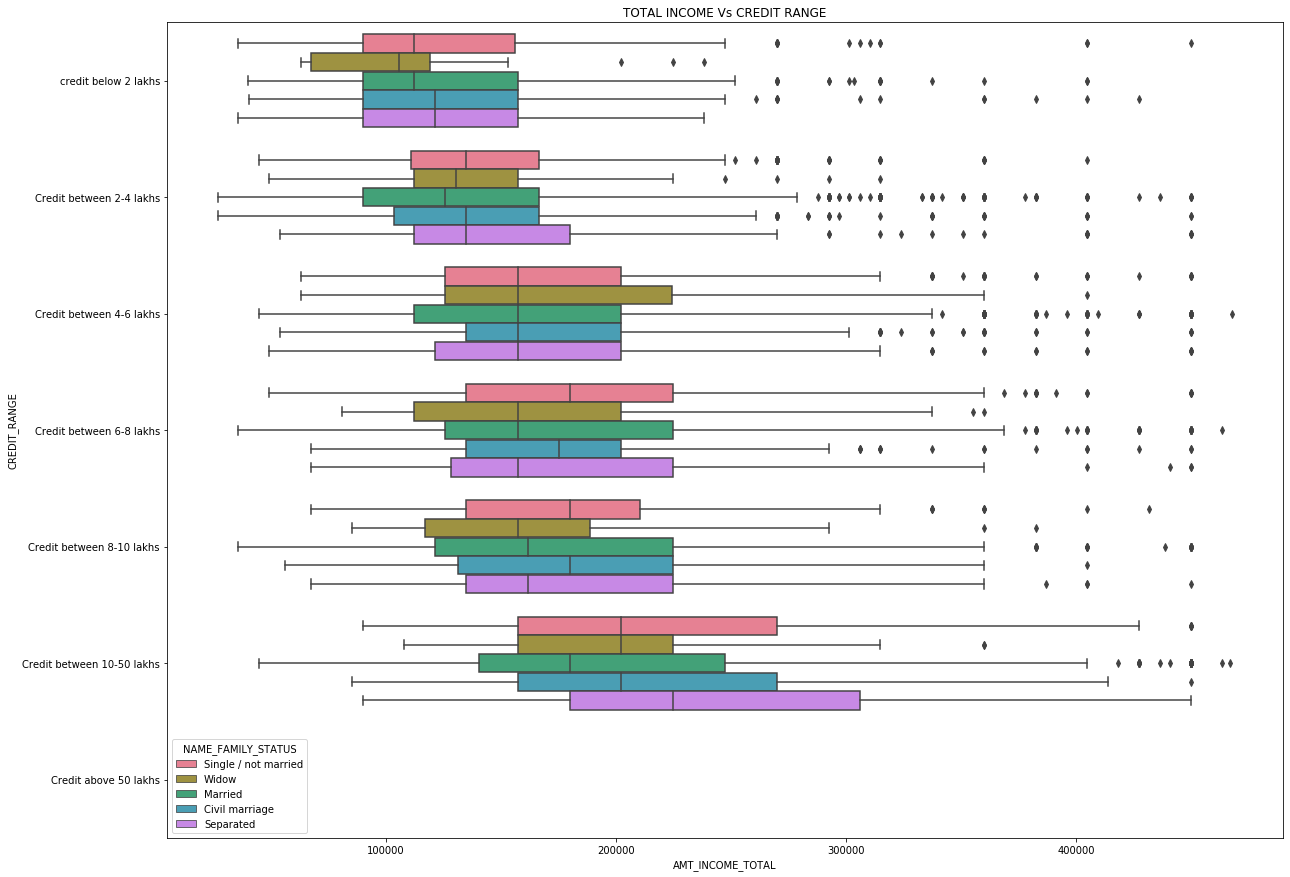

In [67]:
plt.figure(figsize = [20,15])
sns.boxplot(data = Defaulters, x = 'AMT_INCOME_TOTAL', y = 'CREDIT_RANGE', hue ='NAME_FAMILY_STATUS', palette = 'husl' )
plt.title("TOTAL INCOME Vs CREDIT RANGE")
plt.show() 

In [99]:
plt.figure(figsize = [20,15])
sns.boxplot(data = Non_defaulters, x = 'AMT_INCOME_TOTAL', y = 'CREDIT_RANGE', hue ='NAME_FAMILY_STATUS', palette = 'husl' )
plt.title("TOTAL INCOME Vs CREDIT RANGE")
plt.show() 

NameError: name 'Non' is not defined

<Figure size 1440x1080 with 0 Axes>

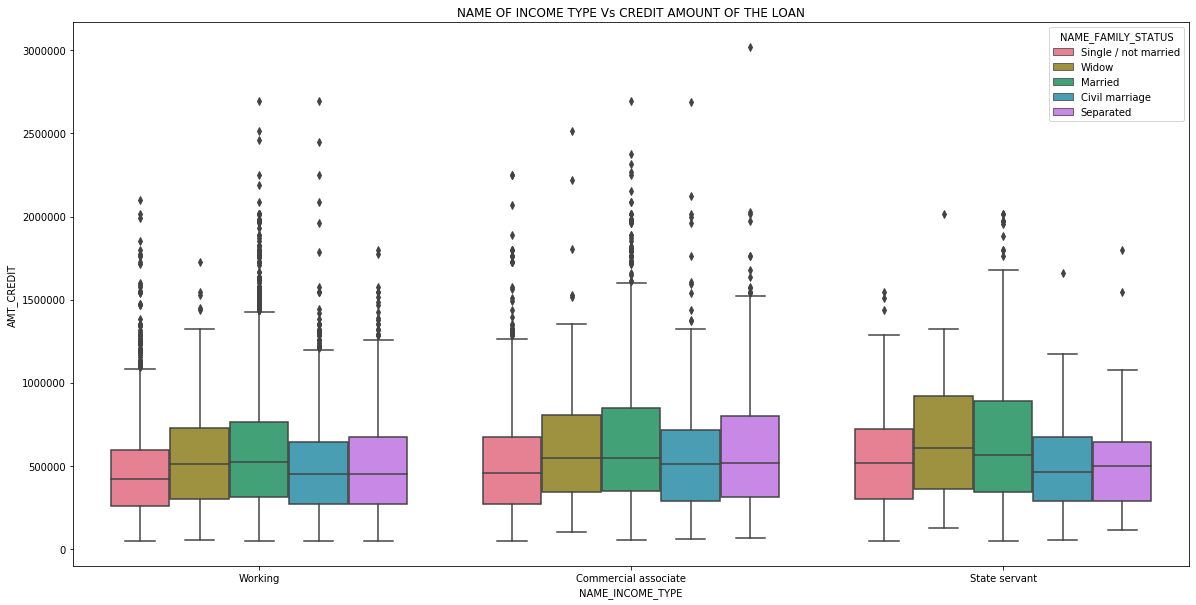

In [68]:
plt.figure(figsize = [20,10])
sns.boxplot(data = Defaulters, x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS', palette = 'husl' )
plt.title("NAME OF INCOME TYPE Vs CREDIT AMOUNT OF THE LOAN")
plt.show() 

In [100]:
plt.figure(figsize = [20,10])
sns.boxplot(data = Non_defaulters, x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS', palette = 'husl' )
plt.title("NAME OF INCOME TYPE Vs CREDIT AMOUNT OF THE LOAN")
plt.show() 

NameError: name 'Non' is not defined

<Figure size 1440x720 with 0 Axes>

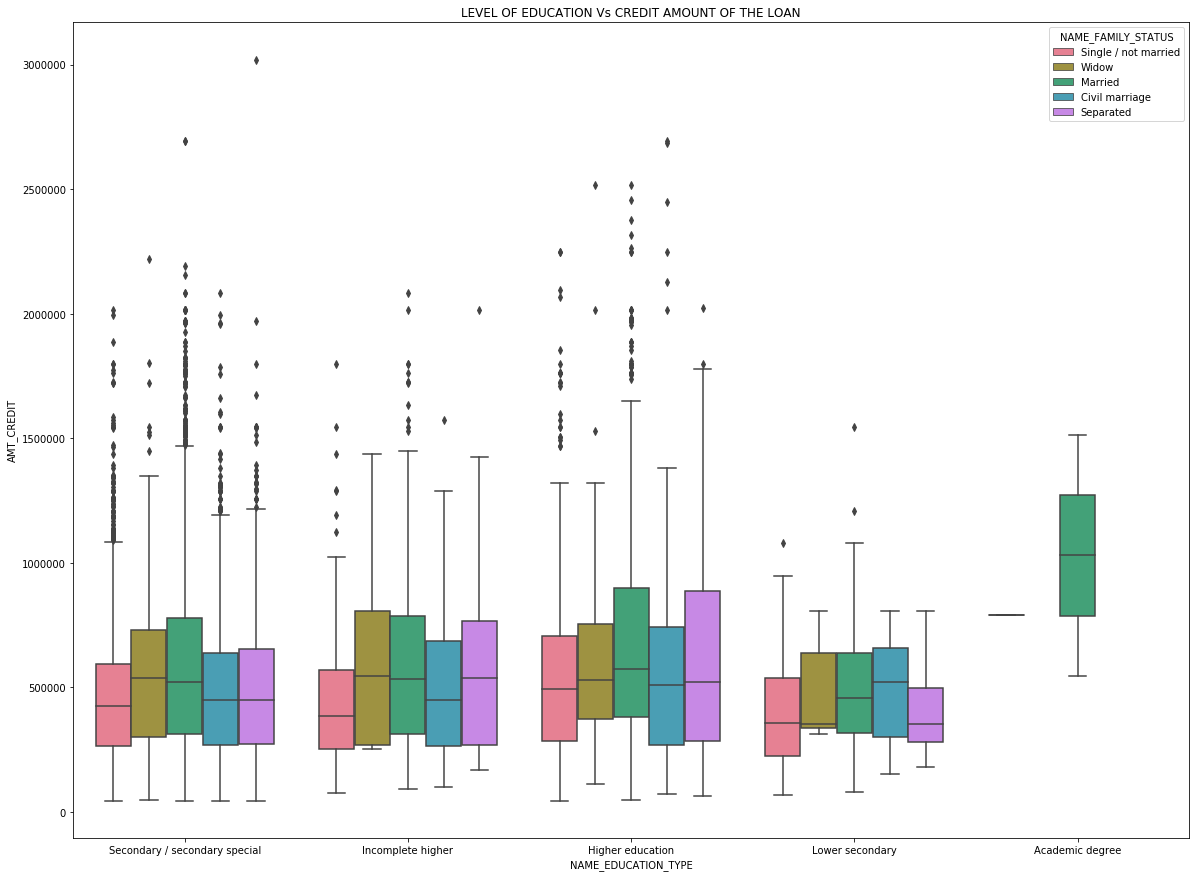

In [69]:
plt.figure(figsize = [20,15])
sns.boxplot(data = Defaulters, x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS', palette = 'husl' )
plt.title("LEVEL OF EDUCATION Vs CREDIT AMOUNT OF THE LOAN")
plt.show() 

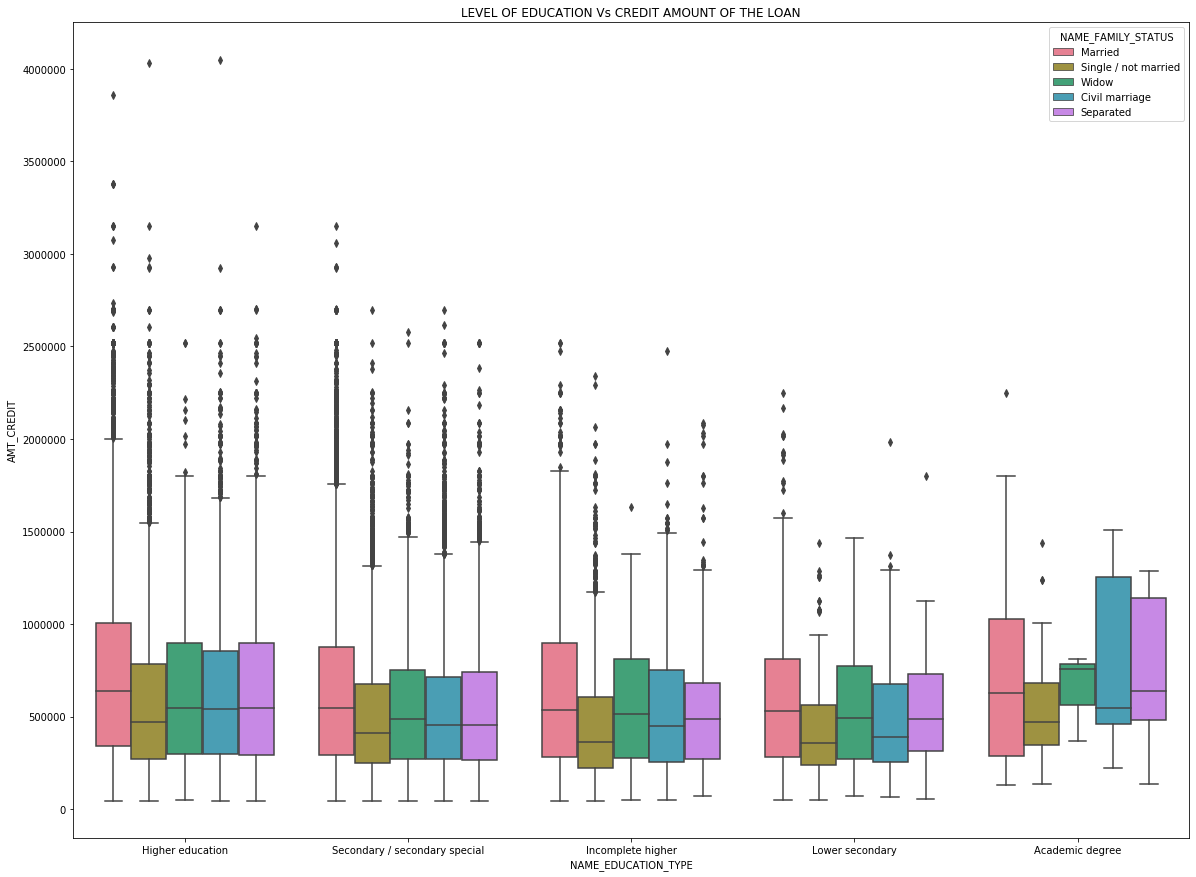

In [103]:
plt.figure(figsize = [20,15])
sns.boxplot(data = Non_defaulters, x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS', palette = 'husl' )
plt.title("LEVEL OF EDUCATION Vs CREDIT AMOUNT OF THE LOAN")
plt.show() 

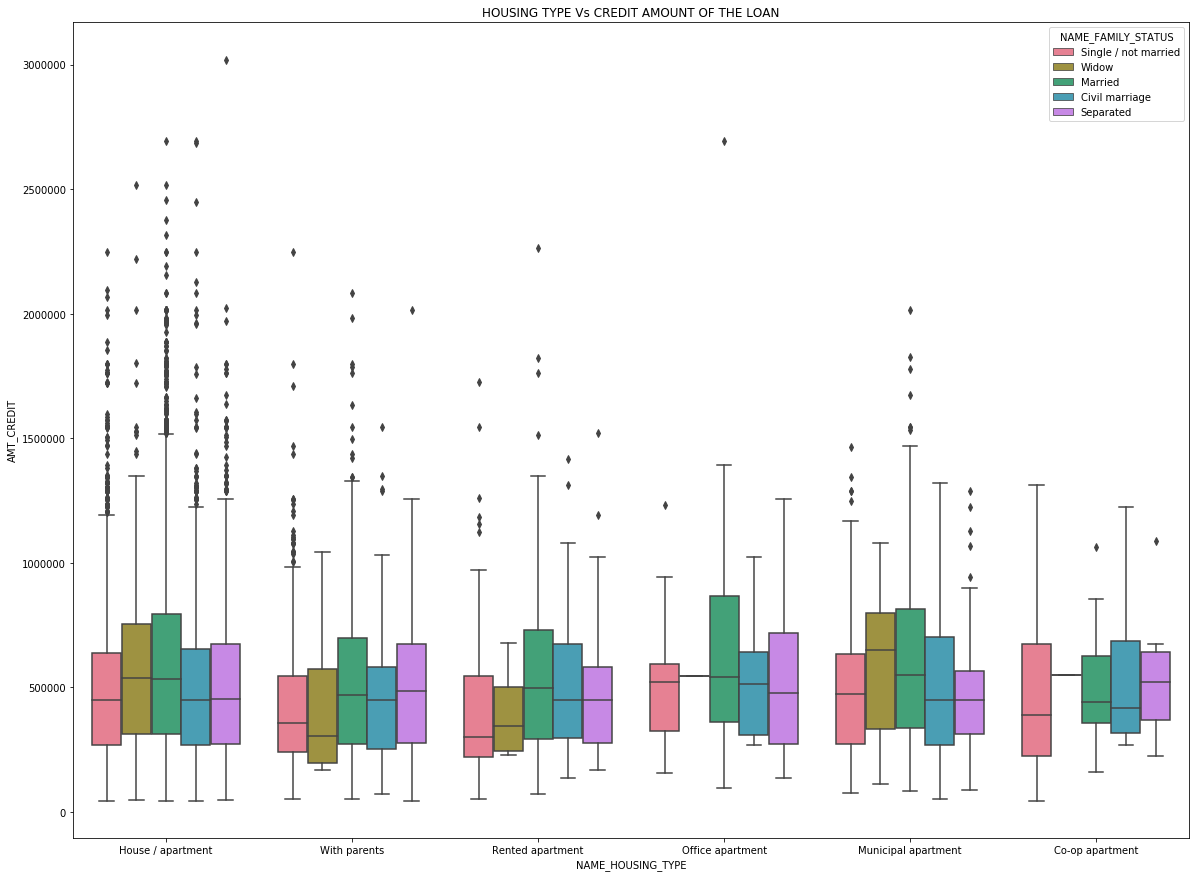

In [70]:
plt.figure(figsize = [20,15])
sns.boxplot(data = Defaulters, x = 'NAME_HOUSING_TYPE', y = 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS', palette = 'husl' )
plt.title("HOUSING TYPE Vs CREDIT AMOUNT OF THE LOAN")
plt.show() 

In [ ]:
plt.figure(figsize = [20,15])
sns.boxplot(data =Non_defaulters, x = 'NAME_HOUSING_TYPE', y = 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS', palette = 'husl' )
plt.title("HOUSING TYPE Vs CREDIT AMOUNT OF THE LOAN")
plt.show() 

### Task 8: Correlations on Defaulters and Non-defaulters

In [71]:
correlatn_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','AMT_REQ_CREDIT_BUREAU_YEAR','YEARS_BIRTH','YEARS_EMPLOYED' ]

In [72]:
#Defaulters
Defaulters_corr = Defaulters[correlatn_cols]
deflt = round(Defaulters_corr.corr(), 2)

In [73]:
deflt

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED
CNT_CHILDREN,1.00,-0.03,-0.00,0.02,-0.01,-0.03,-0.13,0.09,0.90,0.05,0.05,-0.04,-0.03,-0.03,-0.02,-0.01,0.01,0.02,-0.03,-0.19,-0.04
AMT_INCOME_TOTAL,-0.03,1.00,0.35,0.42,0.35,0.11,-0.01,0.03,-0.02,-0.16,-0.18,0.06,0.08,0.16,0.15,-0.01,-0.01,0.00,0.06,0.09,0.02
AMT_CREDIT,-0.00,0.35,1.00,0.75,0.98,0.07,0.03,0.06,0.04,-0.06,-0.07,0.03,0.02,0.03,0.03,-0.03,-0.04,-0.02,-0.03,0.18,0.10
AMT_ANNUITY,0.02,0.42,0.75,1.00,0.75,0.07,-0.02,0.04,0.06,-0.07,-0.08,0.02,0.03,0.06,0.06,-0.01,-0.02,-0.00,-0.01,0.09,0.05
AMT_GOODS_PRICE,-0.01,0.35,0.98,0.75,1.00,0.08,0.03,0.06,0.04,-0.07,-0.08,0.04,0.02,0.04,0.04,-0.03,-0.04,-0.02,-0.04,0.17,0.11
REGION_POPULATION_RELATIVE,-0.03,0.11,0.07,0.07,0.08,1.00,0.06,0.01,-0.03,-0.43,-0.44,0.14,-0.03,0.02,0.04,-0.06,-0.05,-0.02,-0.00,0.05,0.02
DAYS_REGISTRATION,-0.13,-0.01,0.03,-0.02,0.03,0.06,1.00,0.04,-0.13,-0.12,-0.11,0.05,-0.00,0.00,0.00,-0.02,-0.05,-0.03,0.02,0.24,0.13
DAYS_ID_PUBLISH,0.09,0.03,0.06,0.04,0.06,0.01,0.04,1.00,0.09,-0.00,-0.00,-0.01,-0.02,-0.01,0.00,-0.04,-0.02,0.01,0.04,0.11,0.09
CNT_FAM_MEMBERS,0.90,-0.02,0.04,0.06,0.04,-0.03,-0.13,0.09,1.00,0.05,0.05,-0.04,-0.03,-0.04,-0.03,-0.02,0.01,0.03,-0.01,-0.13,-0.01
REGION_RATING_CLIENT,0.05,-0.16,-0.06,-0.07,-0.07,-0.43,-0.12,-0.00,0.05,1.00,0.96,-0.29,-0.03,-0.11,-0.12,0.04,0.01,-0.02,0.02,-0.05,-0.00


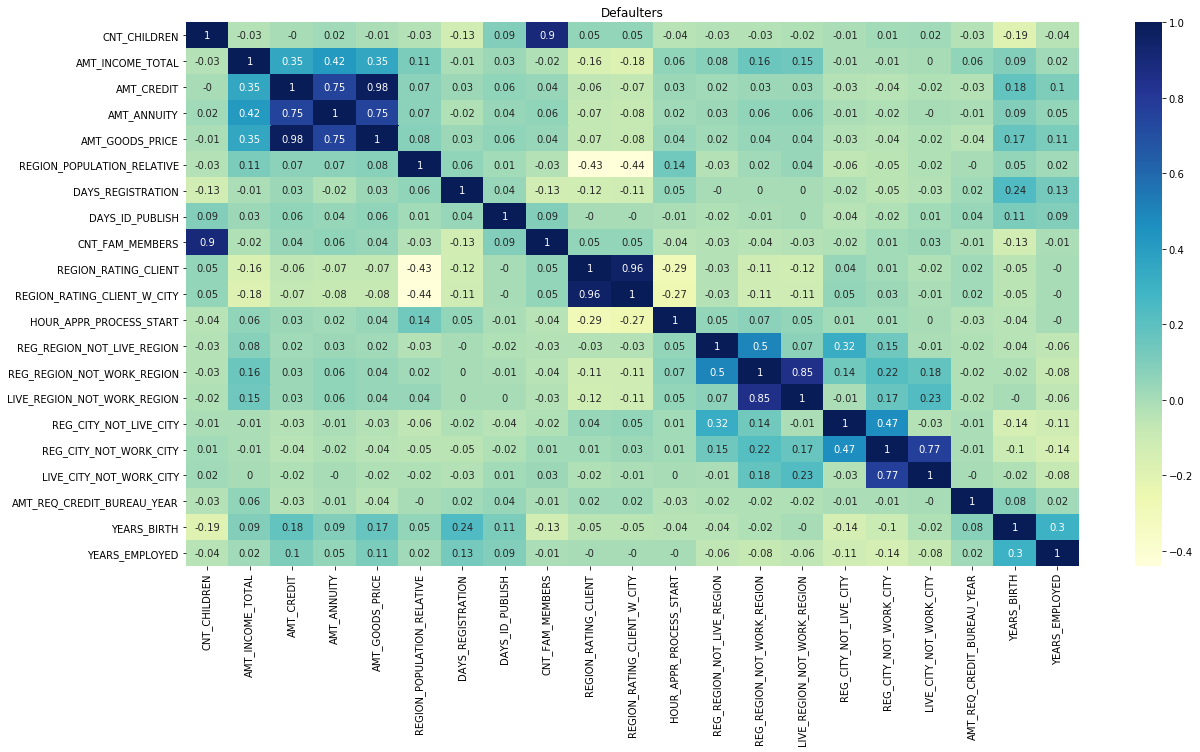

In [74]:
plt.figure(figsize = [20,10])
sns.heatmap(deflt, annot = True, cmap = "YlGnBu")
plt.title("Defaulters")
plt.show()

In [75]:
#Non-Defaulters
Nondefaulters_corr = Non_defaulters[correlatn_cols]
nondeflt = round(Nondefaulters_corr.corr(), 2)

In [76]:
nondeflt

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED
CNT_CHILDREN,1.00,-0.02,-0.02,-0.01,-0.03,-0.03,-0.17,0.12,0.89,0.04,0.04,-0.03,-0.02,-0.02,-0.01,0.00,0.01,0.02,-0.03,-0.26,-0.07
AMT_INCOME_TOTAL,-0.02,1.00,0.38,0.45,0.38,0.19,-0.04,0.02,-0.01,-0.22,-0.24,0.06,0.08,0.16,0.15,0.00,-0.01,-0.01,0.05,0.04,0.03
AMT_CREDIT,-0.02,0.38,1.00,0.77,0.99,0.09,0.02,0.03,0.03,-0.10,-0.11,0.04,0.02,0.04,0.05,-0.04,-0.03,-0.01,-0.05,0.14,0.08
AMT_ANNUITY,-0.01,0.45,0.77,1.00,0.77,0.11,-0.01,0.02,0.04,-0.12,-0.14,0.03,0.04,0.07,0.07,-0.02,-0.03,-0.01,-0.00,0.09,0.05
AMT_GOODS_PRICE,-0.03,0.38,0.99,0.77,1.00,0.10,0.01,0.03,0.03,-0.10,-0.11,0.05,0.02,0.05,0.05,-0.04,-0.04,-0.01,-0.05,0.14,0.08
REGION_POPULATION_RELATIVE,-0.03,0.19,0.09,0.11,0.10,1.00,0.06,0.00,-0.03,-0.53,-0.53,0.16,-0.00,0.06,0.09,-0.05,-0.04,-0.01,0.00,0.04,-0.01
DAYS_REGISTRATION,-0.17,-0.04,0.02,-0.01,0.01,0.06,1.00,0.02,-0.16,-0.09,-0.09,0.03,-0.02,-0.02,-0.01,-0.05,-0.05,-0.03,0.02,0.30,0.17
DAYS_ID_PUBLISH,0.12,0.02,0.03,0.02,0.03,0.00,0.02,1.00,0.11,-0.00,-0.00,-0.00,-0.03,-0.02,-0.01,-0.05,-0.03,-0.00,0.02,0.08,0.07
CNT_FAM_MEMBERS,0.89,-0.01,0.03,0.04,0.03,-0.03,-0.16,0.11,1.00,0.04,0.04,-0.04,-0.03,-0.02,-0.01,-0.01,0.01,0.03,-0.02,-0.20,-0.04
REGION_RATING_CLIENT,0.04,-0.22,-0.10,-0.12,-0.10,-0.53,-0.09,-0.00,0.04,1.00,0.95,-0.27,-0.04,-0.15,-0.16,0.04,0.01,-0.02,0.01,-0.03,0.02


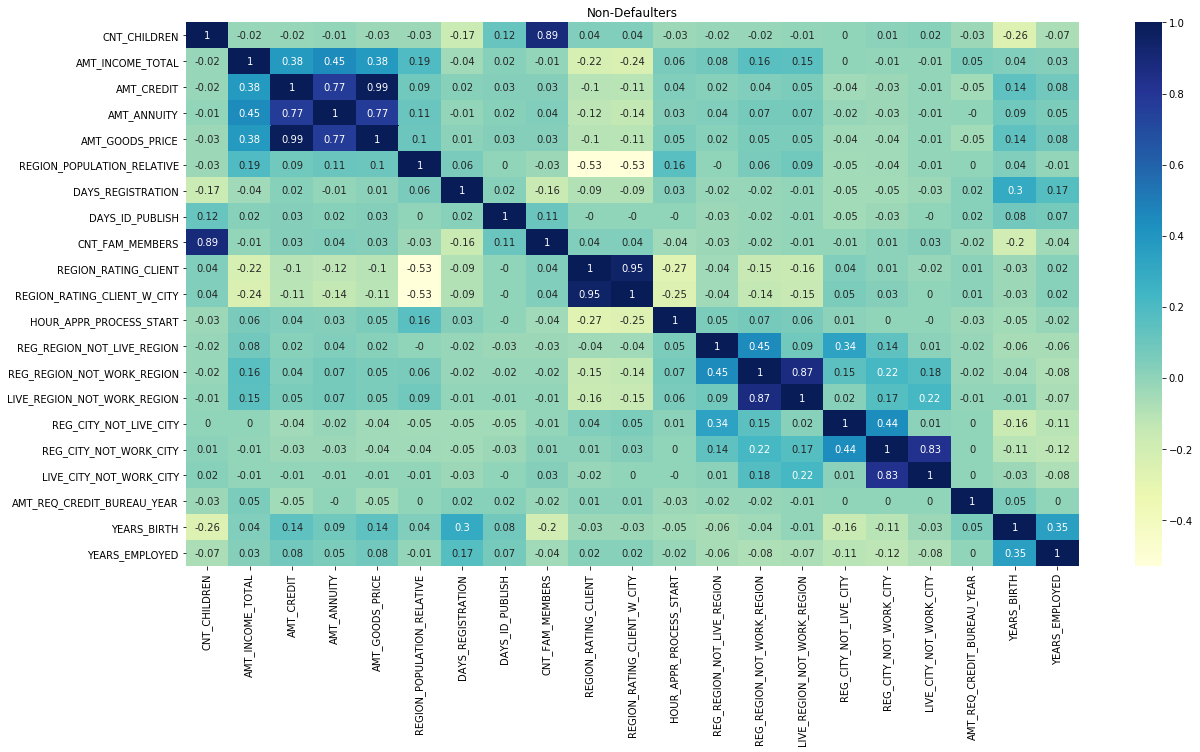

In [77]:
plt.figure(figsize = [20,10])
sns.heatmap(nondeflt, annot = True, cmap = "YlGnBu")
plt.title("Non-Defaulters")
plt.show()

### Task 9: Merging 'Previous_applications' data to 'New_applications' data

In [78]:
# Read the csv file using 'read_csv'.

previous_applications = pd.read_csv('previous_application.csv')

In [79]:
previous_applications.shape

(1670214, 37)

In [80]:
previous_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [81]:
all_applications = pd.merge(left = new_applications, right = previous_applications, how='inner', on=['SK_ID_CURR'], suffixes='_m')

In [82]:
all_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,AGE_GROUP,INCOME_RANGE,CREDIT_RANGE,EMI_RANGE,LOAN_on_GOODS,SK_ID_PREV,NAME_CONTRACT_TYPEm,AMT_ANNUITYm,AMT_APPLICATION,AMT_CREDITm,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEm,WEEKDAY_APPR_PROCESS_STARTm,HOUR_APPR_PROCESS_STARTm,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEm,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1.0,26,2,Middle age(20-40),Income between 2-4 lakhs,Credit between 4-6 lakhs,EMI between 10000-25000,Between 2.5-5 lakhs,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,46,3,Above middle age(40-60),Income between 2-4 lakhs,Credit between 10-50 lakhs,EMI between 25000-50000,Between 10-50 lakhs,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,46,3,Above middle age(40-60),Income between 2-4 lakhs,Credit between 10-50 lakhs,EMI between 25000-50000,Between 10-50 lakhs,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.0,46,3,Above middle age(40-60),Income between 2-4 lakhs,Credit between 10-50 lakhs,EMI between 25000-50000,Between 10-50 lakhs,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / s

In [83]:
all_applications.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE_             0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_                     0.000000
AMT_ANNUITY_                    0.000000
AMT_GOODS_PRICE_                0.000000
NAME_TYPE_SUITE_                0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL      

In [84]:
# Dropping missing values more than 40%
#all_applications = all_applications.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITEm','NAME_SELLER_INDUSTRY','CODE_REJECT_REASON'], axis = 1)

In [85]:
# Dropping unnecessary columns
#all_applications = all_applications.drop(all_applications.loc[:,'DAYS_FIRST_DRAWING':'DAYS_TERMINATION'], axis = 1)

In [86]:
# all_applications['NAME_CASH_LOAN_PURPOSE'].value_counts()

In [87]:
# Removing the column values of 'XNA' and 'XAP'

all_applications = all_applications[~(all_applications['NAME_CASH_LOAN_PURPOSE'] == 'XNA')]
all_applications = all_applications[~(all_applications['NAME_CASH_LOAN_PURPOSE'] == 'XAP')]

In [88]:
Defltrs = all_applications[all_applications.TARGET == 0]
Nondefltrs = all_applications[all_applications.TARGET == 1]

In [89]:
#all_applications.shape

In [90]:
all_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,AGE_GROUP,INCOME_RANGE,CREDIT_RANGE,EMI_RANGE,LOAN_on_GOODS,SK_ID_PREV,NAME_CONTRACT_TYPEm,AMT_ANNUITYm,AMT_APPLICATION,AMT_CREDITm,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEm,WEEKDAY_APPR_PROCESS_STARTm,HOUR_APPR_PROCESS_STARTm,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEm,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
76,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,5266.0,3787,1,1,0,1,0,1,2,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,5.0,42,7,Above middle age(40-60),Income between 2-4 lakhs,Credit between 6-8 lakhs,EMI between 10000-25000,Between 2.5-5 lakhs,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
102,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,3557.0,3557,1,1,0,1,0,0,3,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,1.0,32,6,Middle age(20-40),Income between 2-4 lakhs,Credit between 6-8 lakhs,EMI between 25000-50000,Between 5-7.5 lakhs,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
120,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,8236.0,4292,1,1,0,1,0,0,2,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,1.0,44,5,Above middle age(40-60),Income Below 2 lakhs,Credit between 4-6 lakhs,EMI between 25000-50000,Between 5-7.5 lakhs,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
121,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,8236.0,4292,1,1,0,1,0,0,2,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,1.0,44,5,Above middle age(40-60),Income Below 2 lakhs,Credit between 4-6 lakhs,EMI between 25000-50000,Between 5-7.5 lakhs,1529558,Cash loans,29053.215,450000.0,555723.0,NaN,450000.0,MONDAY,15,Y,1,NaN,NaN,NaN,Repairs,Refused,-449,Cash through the bank,LIMIT,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
144,100060,0

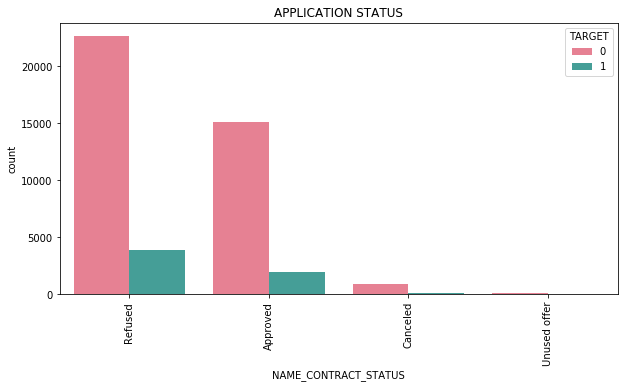

In [91]:
# NAME_CONTRACT_STATUS
plt.figure(figsize = [10,5])
sns.countplot('NAME_CONTRACT_STATUS', data = all_applications, hue = 'TARGET', palette = 'husl')
plt.xticks(rotation=90)
plt.title("APPLICATION STATUS")
plt.show()

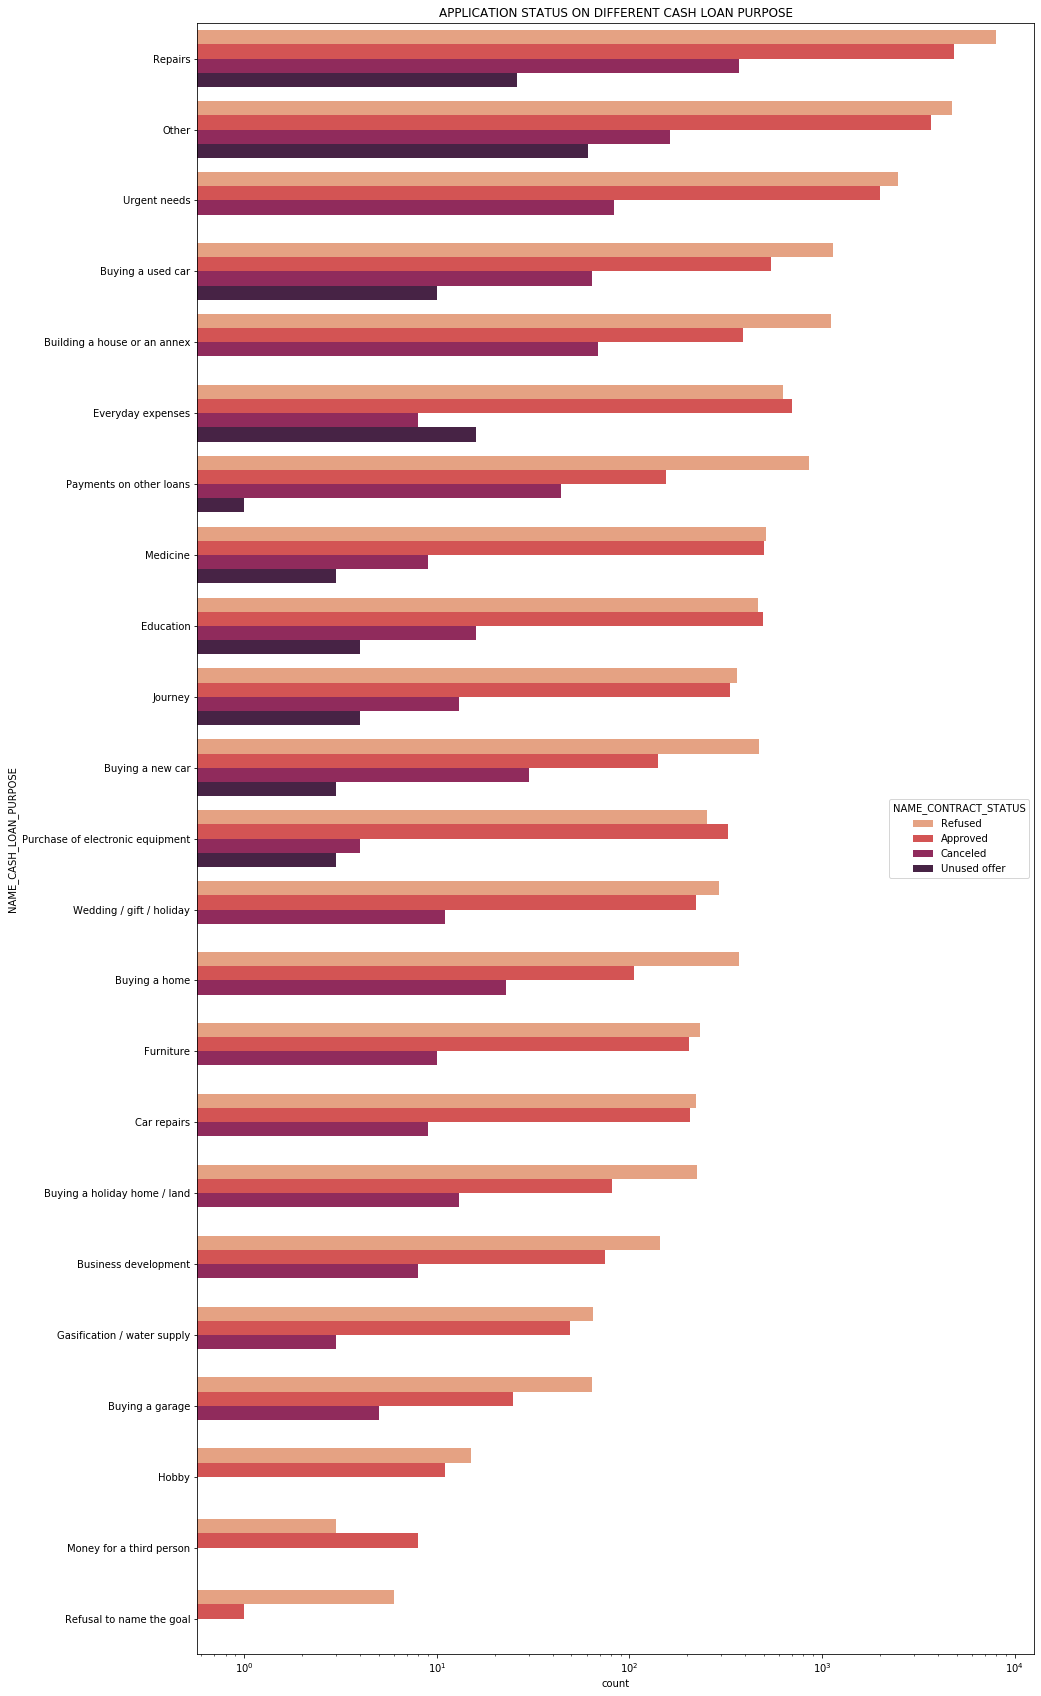

In [92]:
# NAME_CASH_LOAN_PURPOSES
plt.figure(figsize=(15,30))
plt.xscale('log')
sns.countplot(data = Defltrs, y= 'NAME_CASH_LOAN_PURPOSE', order=Defltrs['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS', palette = 'rocket_r')
plt.title("APPLICATION STATUS ON DIFFERENT CASH LOAN PURPOSE")
plt.show()


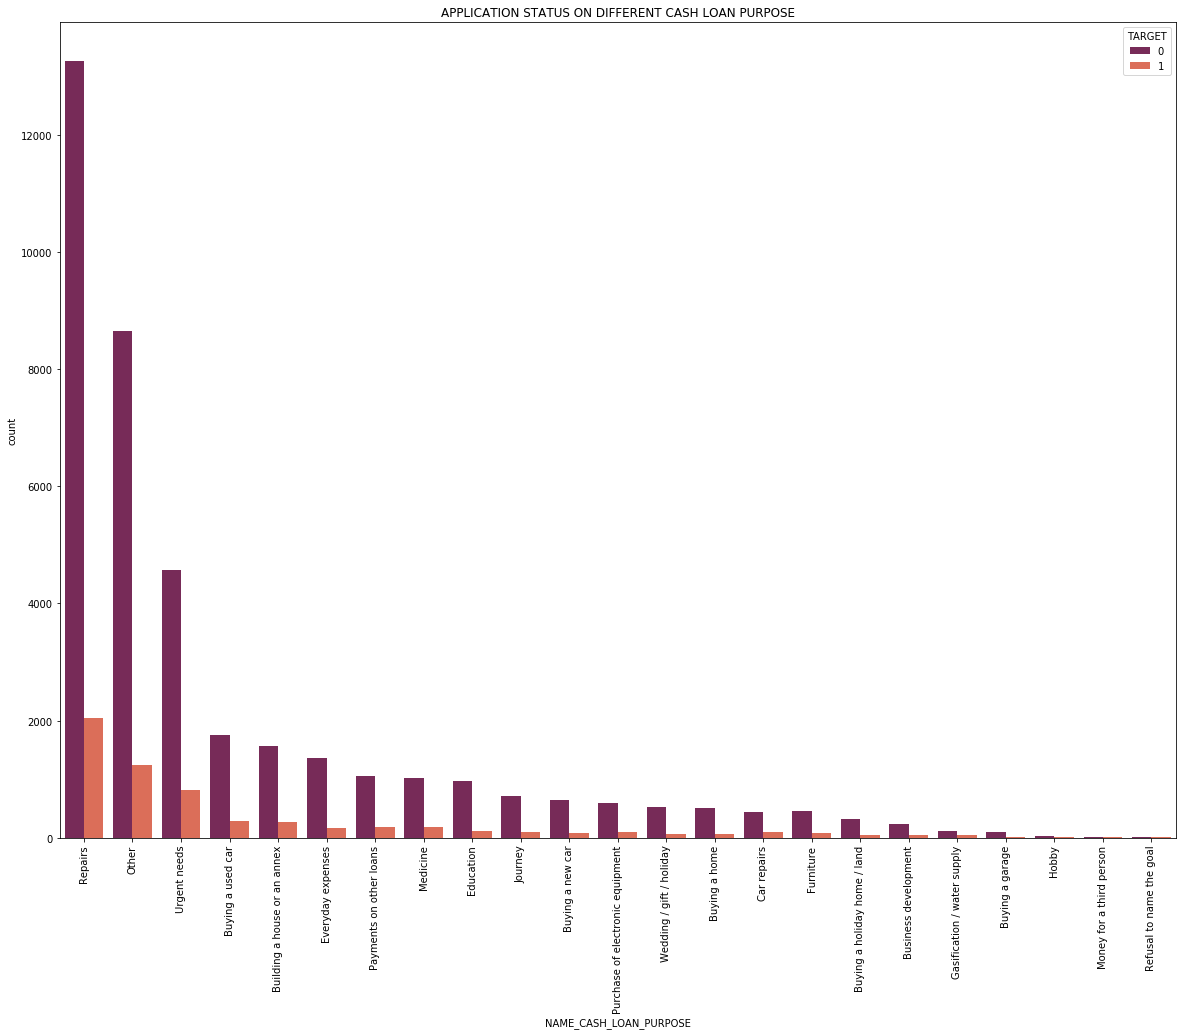

In [93]:
# NAME_CASH_LOAN_PURPOSES
plt.figure(figsize = [20,15])
sns.countplot('NAME_CASH_LOAN_PURPOSE', data = all_applications, order=all_applications['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'TARGET', palette = 'rocket')
plt.xticks(rotation=90)
plt.title("APPLICATION STATUS ON DIFFERENT CASH LOAN PURPOSE")
plt.show()

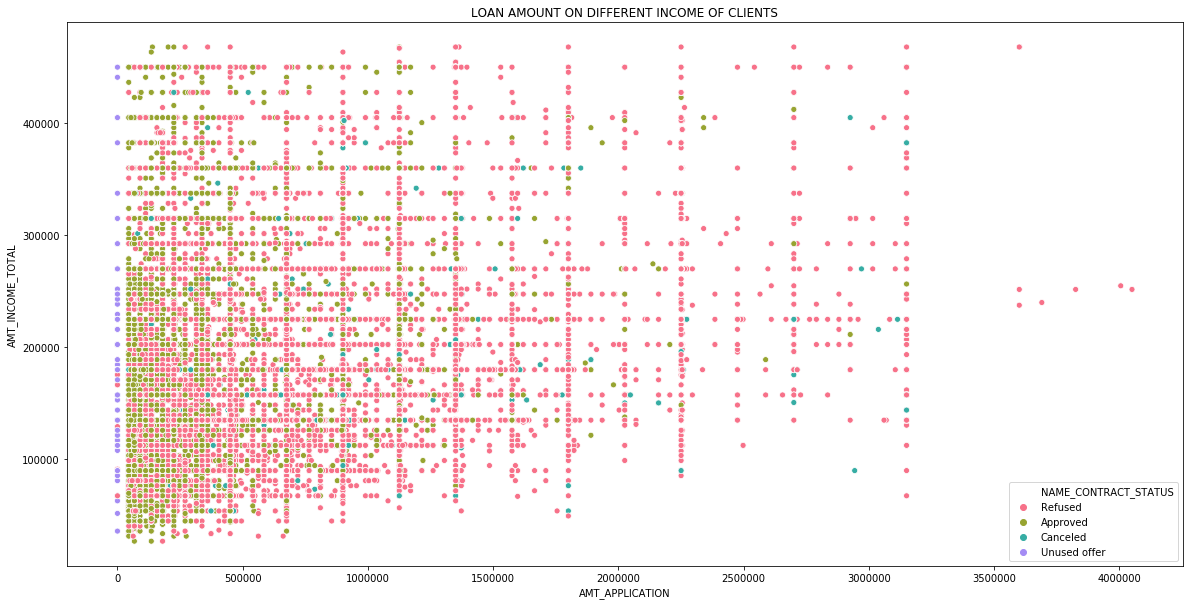

In [94]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=all_applications, hue = 'NAME_CONTRACT_STATUS', palette = 'husl')
plt.title("LOAN AMOUNT ON DIFFERENT INCOME OF CLIENTS")
plt.show()

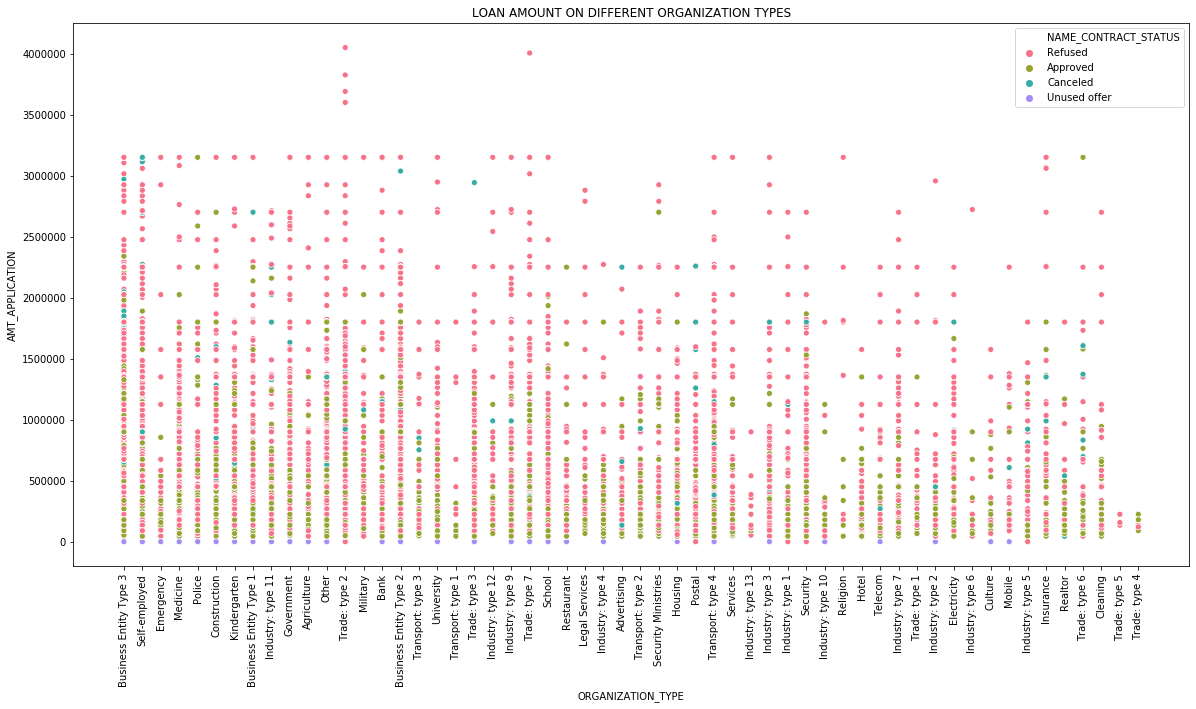

In [95]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='ORGANIZATION_TYPE',y='AMT_APPLICATION',data=all_applications, hue = 'NAME_CONTRACT_STATUS', palette = 'husl')
plt.xticks(rotation=90)
plt.title("LOAN AMOUNT ON DIFFERENT ORGANIZATION TYPES")
plt.show()